#**Fnet**
---

<font size = 4> 
Fnet is a neural network used to infer the features of cellular structures from brightfield or EM images without coloured labels. The network is trained using paired training images from the same field of view, imaged in a label-free (e.g. brightfield) and labelled condition (e.g. fluorescent protein). When trained, this allows the user to identify certain structures from brightfield images alone. The performance of fnet may depend significantly on the structure at hand.

---
<font size = 4> *Disclaimer*:

<font size = 4> This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4> This notebook is largely based on the paper: **Label-free prediction of three-dimensional fluorescence images from transmitted light microscopy** by *Chawin Ounkomol, Sharmishtaa Seshamani, Mary M. Maleckar, Forrest Collman & Gregory R. Johnson*  (https://www.nature.com/articles/s41592-018-0111-2)

<font size = 4> And source code found in: https://github.com/AllenCellModeling/pytorch_fnet

<font size = 4> **Please also cite this original paper when using or developing this notebook.** 

# **How to use this notebook?**

---
###**Structure of a notebook**

<font size = 4>A notebook is conveniently made of text annotation that describe the code and workflow (**Text cells**) as well as sections that contain the code that is executed (**Code cells**).  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom the table of contents, code snippets and files.

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---

<font size = 4> This notebook provides two opportunities: firstly, to download and train Fnet with data published in the original manuscript or secondly, to upload a personal dataset and train Fnet on it.
<font size = 4> The notebook may require a large amount of disk space. If using the datasets from the paper, the available disk space on the user's google drive should contain at least 40GB.

##**0.1 Data Format**
<font size = 4> The data used to train fnet must be in either .czi or .tiff (.tif) file format and contain at least one signal and one target channel of each field of view. To use this notebook on user data, upload the data in the following format to your google drive. To ensure corresponding images are used during training give corresponding signal and target images the same name.

<font size = 4> **Note: Your *dataset_folder* should not have spaces or brackets in its name as this is not recognized by the fnet code and will throw an error** 

###**For .tif files**
- gdrive
  - My Drive
      - dataset_folder
        - signal
            - img_1, img_2, ...
        - target
            - img_1, img_2, ...

####The folders with your signal and target files should be called 'signal' and 'target', repsectively.

###**For .czi files**
- gdrive
  - My Drive
      - dataset_folder
          - files containing signal and target in separate channels in stack


#**1. Set Runtime type and mount your Google Drive**
---



## **1.1. Change the Runtime**
---

<font size = 4> Go to **Runtime -> Change the Runtime type**

<font size = 4> **Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4> **Accelator: GPU** *(Graphics processing unit (GPU)*

<font size = 4> If you have GPU access, this cell will also tell you which type of GPU colab is using.

In [0]:
#@title Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15517312190808755133, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11946974857801058957
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5346926289652851467
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13756672004759393830
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the below cell to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter.

In [1]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#**2. Install Fnet and dependencies**
---
<font size = 4>The fnet folder will be downloaded into your drive and should be found under gdrive/My Drive/pytorch_fnet. As Fnet needs a several packages to be installed, this step may take a few minutes. 

In [29]:
#@markdown ##Play this cell to download fnet to your drive. If it is already installed this will only install the fnet dependencies.

import os
import csv
import shutil

#Ensure tensorflow 1.x
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

print("Tensorflow enabled.")

#clone fnet from github to colab
import shutil
import os
!pip install -U scipy==1.2.0
if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet'):
  !git clone -b release_1 --single-branch https://github.com/AllenCellModeling/pytorch_fnet.git; cd pytorch_fnet; pip install .
  shutil.move('/content/pytorch_fnet','/content/gdrive/My Drive/pytorch_fnet')

1.15.0
Tensorflow enabled.
     |████████████████████████████████| 26.6MB 106kB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


#**3. Select your paths and parameters**
---
<font size = 5> **Datasets**

<font size = 4> Fnet comes with a repository of training datasets. 

<font size = 4> **`Choose Dataset:`** gives you the choice to use these datasets or your own dataset to train fnet. Choosing *Use Own Data* has the advantage that inference on further data of the same type will likely be better than training on other datasets. However, if such a dataset is unavailable or you want to test on the fnet datasets, choose the *Download Data* option.

<font size = 4> **If** you choose ***Download Dataset*** select which one you want to use from the dropdown **`download_dataset`**.

<font size = 5> **Paths for training data**

<font size = 4> **If** you ***Use Own Dataset*** enter the path of the folder your source and target folders are located in in the **`own_dataset`** field. The name of this folder will decide the name of the model you train.

<font size = 4> **`signal_folder:`** Enter the path of the folder with the signal data (should be inside own_dataset).

<font size = 4> **`target_folder:`** Enter the path of the folder with the target data (should be inside own_dataset).

<font size = 5> **Training Parameters**

<font size = 4> **`epochs:`** Input how many epochs (rounds) the network will be trained. A larger number of epochs may improve performance but risks overfitting to the training data. To reach good performance of fnet requires 10000's iterations which will usually require **several hours**, depending on the dataset size. **Default: 50000**


<font size = 5>**Advanced Parameters - experienced users only**


<font size =4>**`batch_size:`** Reducing or increasing the **batch size** may speed up or slow down your training, respectively and can influence network performance. **Default: 4**

<font size = 5>**Troubleshooting:**

<font size = 4> Not enough disk space to download fnet data: If colab disconnects during the download, the disk space provided by colab may run out. Usually, this is prevented as data gets moved to the user's google drive. If the problem persists even after restarting the run time, the dataset may need to be downloaded externally and then manually moved to google drive (use the code below, but on your own machine).

In [34]:
#@markdown ###Datasets
#@markdown Will you be using your *own data* **or** *data from the fnet repository*?
# import os
# import csv
# import shutil


#Datasets

choose_dataset_options = "Use Own Dataset" #@param ["Download Dataset", "Use Own Dataset"]

#@markdown **If** you chose **Download Dataset**, select the dataset to download and train on.
download_dataset = "fibrillarin" #@param ["choose dataset", "beta_actin", "myosin_iib", "membrane_caax_63x", "desmoplakin", "sec61_beta", "st6gal1", "fibrillarin", "lamin_b1", "dic_lamin_b1", "alpha_tubulin", "tom20", "zo1", "timelapse_wt2_s2"]

#@markdown ---

#@markdown ###Path to training images

#@markdown **If** you chose **Own Dataset**, enter the path of the folder the dataset is contained in (own dataset). You also need to enter the paths to the signal and target folders.

#Paths

#Fetch the path and extract the name of the signal folder
signal_folder = "/content/gdrive/My Drive/training/Brightlight_stack" #@param {type: "string"}
signal_name = os.path.basename(os.path.normpath(signal_folder))

#Fetch the path and extract the name of the signal folder
target_folder = "/content/gdrive/My Drive/training/TOM20_stack_high_SNR" #@param {type: "string"}
target_name =  os.path.basename(os.path.normpath(target_folder))

#@markdown ###Model name and model path
model_name = "Fnet_Chris" #@param {type:"string"}
model_path = "/content/gdrive/My Drive/" #@param {type:"string"}

if choose_dataset_options == "Download Dataset":
  dataset = download_dataset
  dataset_x = dataset+"}"
  #check if the dataset already exists in the data folder. If not, then download.
  if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset):
    os.chdir('/content/gdrive/My Drive/pytorch_fnet')
    !chmod u+x ./scripts/paper/download_all_data.sh #add permissions to edit sh file
    !sed -i 's/(.*)/("$dataset")/' ./scripts/paper/download_all_data.sh #change dataset to be downloaded in the download_all_data.sh file
    !./scripts/paper/download_all_data.sh #download dataset
else:
  dataset = model_name #The name of the dataset and the model will be the same

  #Here, we check if the dataset already exists. If not, copy the dataset from google drive to the data folder
  
  if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset):
    #shutil.copytree(own_dataset,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset)
    os.makedirs('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset)
    shutil.copytree(signal_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name)
    shutil.copytree(target_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name)
  elif os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name):
    print('The dataset is already in the right location')
  
  #Create a path_csv file to point to the training images
  os.chdir('/content/gdrive/My Drive/pytorch_fnet/data')
  signal = os.listdir('./'+dataset+'/'+signal_name)
  target = os.listdir('./'+dataset+'/'+target_name)
  with open(dataset+'.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["path_signal","path_target"])
      for i in range(0,len(signal)):
        writer.writerow(["/content/gdrive/My Drive/pytorch_fnet/data/"+dataset+"/"+signal_name+"/"+signal[i],"/content/gdrive/My Drive/pytorch_fnet/data/"+dataset+"/"+target_name+"/"+target[i]])

  shutil.move('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'.csv','/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+dataset+'.csv')

#print("Selected "+dataset+" as training set")

dataset_x = dataset+"}" # this variable is only used to ensure closed curly brackets when editing the .sh files

#@markdown ---

#@markdown ###Training Parameters

#Training parameters in fnet are indicated in the train_model.sh file.
#Here, we edit this file to include the desired parameters

#1. Add permissions to train_model.sh
os.chdir("/content/gdrive/My Drive/pytorch_fnet/scripts")
!chmod u+x train_model.sh

#2. Select parameters
epochs =  5000#@param {type:"number"}
batch_size =  4#@param {type:"number"}
number_of_images =  len(os.listdir(signal_folder))

#3. Insert the above values into train_model.sh
!if ! grep saved_models\/\${ train_model.sh;then sed -i 's/saved_models\/.*/saved_models\/\${DATASET}"/g' train_model.sh; fi 
!sed -i "s/1:-.*/1:-$dataset_x/g" train_model.sh #change the dataset to be trained with
!sed -i "s/N_ITER=.*/N_ITER=$epochs/g" train_model.sh #change the number of training iterations (epochs)
!sed -i "s/BUFFER_SIZE=.*/BUFFER_SIZE=$number_of_images/g" train_model.sh #change the number of training images
!sed -i "s/BATCH_SIZE=.*/BATCH_SIZE=$batch_size/g" train_model.sh #change the batch size

#We also change the training split as in our notebook the test images are used separately for prediction and we want fnet to train on the whole training data set.
!sed -i "s/train_size .* -v/train_size 1.0 -v/g" train_model.sh

#4. class_dataset
#Fnet uses specific dataset classes depending on the type of input data the user uses.
#Here, we use the path_csv file to find out if the dataset needs to be a tiff or czi dataset.

mycsv = csv.reader(open('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+dataset+'.csv'))
for row in mycsv:
   text = row[0]
os.chdir("/content/gdrive/My Drive/pytorch_fnet/")

#If the dataset has czi files, and the train_model.sh has either no class_dataset argument 
#or class_dataset = TiffDataset we change it to CziDataset
if text.endswith('.czi'):
  !if ! grep class_dataset ./scripts/train_model.sh;then sed -i 's/ITER} \\/ITER} \\\'$''\n'       --class_dataset CziDataset \\/' ./scripts/train_model.sh; fi
  !if grep TiffDataset ./scripts/train_model.sh;then sed -i 's/TiffDataset/CziDataset/' ./scripts/train_model.sh; fi

#If the dataset has tif or tiff files, and the train_model.sh has either no class_dataset argument 
#or class_dataset = CziDataset we change it to TiffDataset
elif text.endswith('.tif') or text.endswith('.tiff'):
  !chmod u+x ./scripts/train_model.sh
  !if ! grep class_dataset ./scripts/train_model.sh;then sed -i 's/ITER} \\/ITER} \\\'$''\n'       --class_dataset TiffDataset \\/' ./scripts/train_model.sh; fi
  !if grep CziDataset ./scripts/train_model.sh;then sed -i 's/CziDataset/TiffDataset/' ./scripts/train_model.sh; fi

#If new parameters are inserted here for training a model with the same name
#the previous training csv needs to be removed, to prevent the model using the old training split or paths.
if os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+dataset):
  shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+dataset)

RUN_DIR="saved_models/${DATASET}"
       --class_dataset TiffDataset \


#**4. Train the model**
---
<font size = 4>Before training, carefully read the different options. This applies especially if you have trained fnet on a dataset before. When training is complete your model will be saved in the *saved_models* folder inside pytorch_fnet under the name of your training dataset folder.


###**Choose one of the options to train fnet**.

<font size = 4>**4.1.** If this is the first training on the chosen dataset, play this section to start training.

<font size = 4>**4.2.** If you want to continue training on an already trained model choose this section

<font size = 4><font color = red> **Carefully read the options before starting training.**

##**4.1. Train a new model**
---

####Play the cell below to start training. 

<font size = 4>**Note:** If you are training with a model of the same name as before, the model will be overwritten. If you want to keep the previous model save it before playing the cell below or give your model a different name (section 3).

In [35]:
# import os
# import shutil
import datetime

#Save old model?
#save_previous_model = False #@param {type:"boolean"}

#now = datetime.datetime.now()
#Overwriting old models and saving them separately if True
if os.path.exists('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset):
  shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset)

#@markdown ##4.1. Start Training
#with 50 images in buffer from dataset and 5000 epochs, takes around 1:30h

#This tifffile release runs error-free in this version of fnet.
!pip install tifffile==2019.7.26

os.chdir('/content/gdrive/My Drive/pytorch_fnet/fnet/')

#Here we import an additional module to the functions.py file to run it without errors.
#This may be a small bug in the original code.

f = open("functions.py", "r")
contents = f.readlines()
f.close()
f = open("functions.py", "r")
if not 'import fnet.fnet_model' in f.read():
  contents.insert(5, 'import fnet.fnet_model')
f.close()
f = open("functions.py", "w")
contents = "".join(contents)
f.write(contents)
f.close()
os.chdir('/content/gdrive/My Drive/pytorch_fnet/')

#If a model with the same name already exists it will be deleted from the pytorch_fnet/saved_models folder and moved to the model_path folder.
if os.path.exists('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset):
  if save_old_model == True:
    now = datetime.datetime.now()
    shutil.copytree('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset,model_path+'/previously_trained'+dataset+' '+str(now))
  shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset)

#Here we start the training
!./scripts/train_model.sh $dataset 0

if os.path.exists(model_path+'/'+dataset):
  shutil.rmtree(model_path+'/'+dataset)
shutil.copytree('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset,model_path+'/'+dataset)

#Get rid of duplicates of training data in pytorch_fnet after training completes
shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name)
shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name)

Streaming output truncated to the last 5000 lines.
num_iter:     46 | loss_batch: 1.329
num_iter:     47 | loss_batch: 0.964
num_iter:     48 | loss_batch: 0.936
num_iter:     49 | loss_batch: 1.082
num_iter:     50 | loss_batch: 0.839
num_iter:     51 | loss_batch: 0.996
num_iter:     52 | loss_batch: 0.684
num_iter:     53 | loss_batch: 0.867
num_iter:     54 | loss_batch: 1.790
num_iter:     55 | loss_batch: 0.982
num_iter:     56 | loss_batch: 1.022
num_iter:     57 | loss_batch: 0.576
num_iter:     58 | loss_batch: 0.930
num_iter:     59 | loss_batch: 0.950
num_iter:     60 | loss_batch: 1.406
num_iter:     61 | loss_batch: 0.712
num_iter:     62 | loss_batch: 0.948
num_iter:     63 | loss_batch: 0.597
num_iter:     64 | loss_batch: 0.693
num_iter:     65 | loss_batch: 0.796
num_iter:     66 | loss_batch: 0.376
num_iter:     67 | loss_batch: 0.843
num_iter:     68 | loss_batch: 0.317
num_iter:     69 | loss_batch: 1.041
num_iter:     70 | loss_batch: 0.721
num_iter:     71 | loss_

##**4.2. Training from a previously saved model**
---
<font size = 4>This section allows you to use networks you have previously trained and saved in your pytorch_fnet folder and to continue training them for more epochs or on a different dataset.

In [42]:
#@markdown To test if performance improves after the initial training, you can continue training on the old model. This option can also be useful if Colab disconnects or times out.
#@markdown Type the name (not the path) of the dataset you want to continue training on.
import csv

signal_folder = "/content/gdrive/My Drive/training/Brightlight_stack" #@param {type: "string"}
signal_name = os.path.basename(os.path.normpath(signal_folder))

#Fetch the path and extract the name of the signal folder
target_folder = "/content/gdrive/My Drive/training/TOM20_stack_high_SNR" #@param {type: "string"}
target_name =  os.path.basename(os.path.normpath(target_folder))

model_name = "Fnet_Chris" #@param {type:"string"}
dataset = model_name

model_path = "/content/gdrive/My Drive" #@param {type:"string"}

dataset_x = dataset+"}"

if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset):
  shutil.copytree(model_path+'/'+model_name,'/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset)

if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset):
  os.mkdir('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset)
  shutil.copytree(signal_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name)
  shutil.copytree(target_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name)
elif not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name):
  shutil.copytree(signal_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name)
  shutil.copytree(target_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name)

os.chdir('/content/gdrive/My Drive/pytorch_fnet/scripts')
#Change the train_model.sh file to include chosen dataset
!sed -i "s/1:-.*/1:-$dataset_x/g" train_model.sh

#Find the number of previous training epochs from loss csv file

with open(model_path+'/'+dataset+'/losses.csv') as f:
  previous_epochs = sum(1 for line in f)
print('continuing training after epoch '+str(previous_epochs-1))

print('To start re-training play section 4.2. below')

#@markdown For how many additional epochs do you want to train the model?
add_epochs =  50000#@param {type:"number"}

#Calculate the new number of total training epochs. Subtract 1 to discount the title row of the csv file.
new_epochs = previous_epochs + add_epochs -1
os.chdir('/content/gdrive/My Drive/pytorch_fnet/scripts')

#Edit train_model.sh file to include new total number of training epochs
!sed -i "s/N_ITER=.*/N_ITER=$new_epochs/g" train_model.sh

continuing training after epoch 5000
To start re-training play section 4.2. below


In [0]:
#@markdown ##4.2. Start re-training model
!pip install tifffile==2019.7.26
import os
os.chdir('/content/gdrive/My Drive/pytorch_fnet/fnet')

#Here we import an additional module to the functions.py file to run it without errors.
f = open("functions.py", "r")
contents = f.readlines()
f.close()
f = open("functions.py", "r")
if not 'import fnet.fnet_model' in f.read():
  contents.insert(5, 'import fnet.fnet_model')
f.close()
f = open("functions.py", "w")
contents = "".join(contents)
f.write(contents)
f.close()

#Here we retrain the model on the chosen dataset.
os.chdir('/content/gdrive/My Drive/pytorch_fnet/')
!chmod u+x ./scripts/train_model.sh
!./scripts/train_model.sh $dataset 0

#Get rid of duplicates of training data in pytorch_fnet after training completes
shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+signal_name)
shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+target_name)

Streaming output truncated to the last 5000 lines.
num_iter:  17396 | loss_batch: 0.251
num_iter:  17397 | loss_batch: 0.407
num_iter:  17398 | loss_batch: 0.287
num_iter:  17399 | loss_batch: 0.400
num_iter:  17400 | loss_batch: 0.609
num_iter:  17401 | loss_batch: 0.216
num_iter:  17402 | loss_batch: 0.324
num_iter:  17403 | loss_batch: 0.593
num_iter:  17404 | loss_batch: 0.196
num_iter:  17405 | loss_batch: 0.310
num_iter:  17406 | loss_batch: 0.453
num_iter:  17407 | loss_batch: 0.324
num_iter:  17408 | loss_batch: 0.660
num_iter:  17409 | loss_batch: 0.351
num_iter:  17410 | loss_batch: 0.262
num_iter:  17411 | loss_batch: 0.382
num_iter:  17412 | loss_batch: 0.216
num_iter:  17413 | loss_batch: 0.585
num_iter:  17414 | loss_batch: 0.129
num_iter:  17415 | loss_batch: 0.219
num_iter:  17416 | loss_batch: 0.530
num_iter:  17417 | loss_batch: 0.813
num_iter:  17418 | loss_batch: 0.328
num_iter:  17419 | loss_batch: 0.652
num_iter:  17420 | loss_batch: 0.240
num_iter:  17421 | loss_

## **4.3. Evaluate the training**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

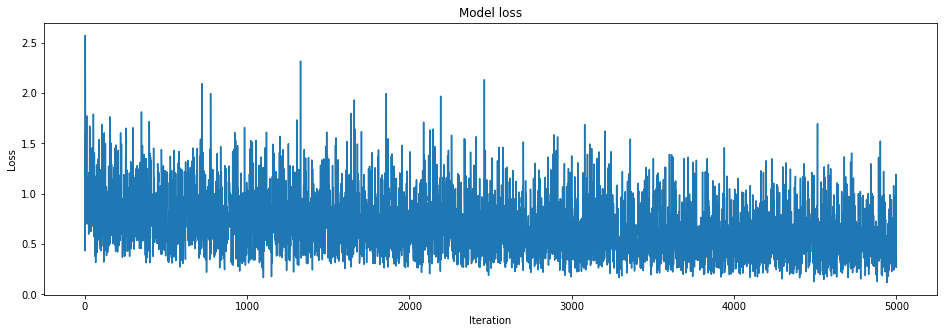

In [38]:
#@markdown ##Play the cell to show figure of training errors

x = []
y = []
import csv
from matplotlib import pyplot as plt
with open(model_path+'/'+dataset+'/'+'losses.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(plots)
    for row in plots:
        x.append(int(row[0]))
        y.append(float(row[1]))

plt.figure(figsize=(16,5))

plt.plot(x,y)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

#**5. Use the network**
---

## **5.1. Generate prediction from test dataset**
---
<font size = 4>**`Test_data_folder`:** This folder should contain the images that you want to predict using a network you trained.

<font size = 4>**`Results_folder`:** This is the path where the predicted images (below) will be saved.

<font size = 4>**`Predictions_name`:** Enter the name under which your images will be stored. This will be added to the file name of the predictions.

<font size = 4>If you want to use a model different from the most recently trained one, untick the box and enter the name of the model in **`inference_model_name`:** and its location in **`inference_model_path`:** to use it for prediction. 

**Note: `inference_model_name` expects a folder name which contains a model.p file from a previous training.**


In [0]:
#Before prediction we will remove the old prediction folder because fnet won't execute if a path already exists that has the same name.
#This is just in case you have already trained on a dataset with the same name
#The data will be saved outside of the pytorch_folder (Results_folder) so it won't be lost when you run this section again.

import shutil  # no need to import these, they're already imported at install
import csv

import os

if os.path.exists('/content/gdrive/My Drive/pytorch_fnet/results'):
  shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/results')

!pip install -U scipy==1.2.0
!pip install --no-cache-dir tifffile==2019.7.26 
from distutils.dir_util import copy_tree

Test_data_folder = "/content/gdrive/My Drive/test/Brightlight_stack_test" #@param {type:"string"}
Results_folder = "/content/gdrive/My Drive/" #@param {type:"string"}

#@markdown ###Under what name do you want to store your output files (no spaces)?
Predictions_name = "MyVeryGoodResults" #@param {type:"string"}
Predictions_name_x = Predictions_name+"}"

#If the folder you are creating already exists, delete the existing version to overwrite.
if os.path.exists(Results_folder+'/'+Predictions_name):
  shutil.rmtree(Results_folder+'/'+Predictions_name)

#@markdown ###Do you want to use the current trained model?

use_the_current_trained_model = False #@param{type:"boolean"}

#@markdown ###If not, provide the name of the model you want to use 
#@markdown (previously saved models are found in the pytorch_fnet/saved_models folder)

inference_model_name = "Fnet_Chris" #@param {type:"string"}
inference_model_path = "" #@param {type:"string"}
if use_the_current_trained_model == True:
  #Move the contents of the saved_models folder from your training to the new folder
  #Here, we use a different copyfunction as we only need the contents of the trained_model folder
  copy_tree('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+dataset,'/content/gdrive/My Drive/pytorch_fnet/saved_models/'+Predictions_name)
else:
  copy_tree(inference_model_path'/'+inference_model_name,'/content/gdrive/My Drive/pytorch_fnet/saved_models/'+Predictions_name)
  dataset = inference_model_name

# Get the name of the folder the test data is in
test_dataset_name = os.path.basename(os.path.normpath(Test_data_folder))

# Get permission to the predict.sh file and change the name of the dataset to the Predictions_folder.
os.chdir('/content/gdrive/My Drive/pytorch_fnet/')
!chmod u+x /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh
!sed -i "s/1:-.*/1:-$Predictions_name_x/g" /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh


!sed -i "s/in test.*/in test/g" /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh

#Are you using .tif or .czi files?
os.chdir('/content/gdrive/My Drive/pytorch_fnet')
mycsv = csv.reader(open('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+dataset+'.csv'))
for row in mycsv:
   text = row[1]

#We need to ensure that the correct dataset class for the dataset is chosen.
#For both CziDataset and TiffDataset Classes we need to test first if the Dataset Class object already exists (grep) in the predict file, and if not insert the correct one.
#If the Dataset Object exists but is not the correct one for the respective dataset (e.g. CziDataset instead of TiffDataset) we need to change it.
if text.endswith('.czi'):
  !if ! grep class_dataset /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh;then sed -i 's/DIR} \\/DIR} \\\'$''\n'     --class_dataset CziDataset \\/' /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh; fi
  !if grep TiffDataset /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh;then sed -i 's/TiffDataset/CziDataset/' ./scripts/predict.sh; fi
elif text.endswith('.tif') or text.endswith('.tiff'):
  !chmod u+x /content/gdrive/My\ Drive/pytorch_fnet//scripts/predict.sh
  !if ! grep class_dataset /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh;then sed -i 's/DIR} \\/DIR} \\\'$''\n'     --class_dataset TiffDataset \\/' /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh; fi
  !if grep CziDataset /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh;then sed -i 's/CziDataset/TiffDataset/' /content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh; fi   


#Create test_data folder in pytorch_fnet

# If your test data is not in the pytorch_fnet data folder it needs to be copied there.
if use_the_current_trained_model == True:
  if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+test_dataset_name):
    shutil.copytree(Test_data_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+test_dataset_name)
else:
  if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/'+Predictions_name+'/'+test_dataset_name):
    shutil.copytree(Test_data_folder,'/content/gdrive/My Drive/pytorch_fnet/data/'+Predictions_name+'/'+test_dataset_name)


# Make a folder that will hold the test.csv file in your new folder
os.chdir('/content/gdrive/My Drive/pytorch_fnet/data/csvs')
if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+Predictions_name):
  os.mkdir('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+Predictions_name)


os.chdir('/content/gdrive/My Drive/pytorch_fnet/data/csvs/')


#Make a new folder in saved_models to use the trained model for inference.
if not os.path.exists('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+Predictions_name):
  os.mkdir('/content/gdrive/My Drive/pytorch_fnet/saved_models/'+Predictions_name) 


#Get file list from the folders containing the files you want to use for inference.
#test_signal = os.listdir('/content/gdrive/My Drive/pytorch_fnet/data/'+dataset+'/'+test_dataset_name)
test_signal = os.listdir(Test_data_folder)

#Now we make a path csv file to point the predict.sh file to the correct paths for the inference files.
os.chdir('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+Predictions_name+'/')

#If an old test csv exists we want to overwrite it, so we can insert new test data.
if os.path.exists('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+Predictions_name+'/test.csv'):
  os.remove('/content/gdrive/My Drive/pytorch_fnet/data/csvs/'+Predictions_name+'/test.csv')

#Here we create a new test.csv
with open('test.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["path_signal","path_target"])
      for i in range(0,len(test_signal)):
        if use_the_current_trained_model ==True:
          writer.writerow(["/content/gdrive/My Drive/pytorch_fnet/data/"+dataset+"/"+test_dataset_name+"/"+test_signal[i],"/content/gdrive/My Drive/pytorch_fnet/data/"+dataset+"/"+test_dataset_name+"/"+test_signal[i]])
        else:
          writer.writerow(["/content/gdrive/My Drive/pytorch_fnet/data/"+Predictions_name+"/"+test_dataset_name+"/"+test_signal[i],"/content/gdrive/My Drive/pytorch_fnet/data/"+Predictions_name+"/"+test_dataset_name+"/"+test_signal[i]])

#We run the predictions
os.chdir('/content/gdrive/My Drive/pytorch_fnet/')
!/content/gdrive/My\ Drive/pytorch_fnet/scripts/predict.sh $Predictions_name 0

#Save the results
results_files = os.listdir('/content/gdrive/My Drive/pytorch_fnet/results/3d/'+Predictions_name+'/test')
for i in range(len(results_files)-2):
  #pred_files = os.listdir('/content/gdrive/My Drive/pytorch_fnet/results/3d/'+Predictions_folder+'/test/'+results_files[i])
  shutil.copyfile('/content/gdrive/My Drive/pytorch_fnet/results/3d/'+Predictions_name+'/test/'+results_files[i]+'/prediction_'+Predictions_name+'.tiff',Results_folder+'/'+'prediction_'+Predictions_name+'_'+str(i)+'.tiff')
  shutil.copyfile('/content/gdrive/My Drive/pytorch_fnet/results/3d/'+Predictions_name+'/test/'+results_files[i]+'/signal.tiff',Results_folder+'/'+'signal'+'_'+str(i)+'.tiff')

#Comment this out if you want to see the total original results from the prediction in the pytorch_fnet folder.
shutil.rmtree('/content/gdrive/My Drive/pytorch_fnet/results')

Requirement already up-to-date: scipy==1.2.0 in /usr/local/lib/python3.6/dist-packages (1.2.0)
     --class_dataset TiffDataset \
+ DATASET=MyVeryGoodResults
+ MODEL_DIR=saved_models/MyVeryGoodResults
+ N_IMAGES=20
+ GPU_IDS=0
+ for TEST_OR_TRAIN in test
+ python predict.py --path_model_dir saved_models/MyVeryGoodResults --class_dataset TiffDataset --path_dataset_csv data/csvs/MyVeryGoodResults/test.csv --n_images 20 --no_prediction_unpropped --path_save_dir results/3d/MyVeryGoodResults/test --gpu_ids 0
Propper(-) => transformer: Cropper('-', 16, 'mid', 9732096)
DEBUG: cropper shape change [32, 368, 368] becomes (32, 368, 368)
/content/gdrive/My Drive/pytorch_fnet/fnet/transforms.py:172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_out = x_in[slices].copy()
s

##**5.2. Assess predicted output**
---
<font size = 4>**Note:** Fnet reshapes the dimensions of images for training, which may result in a loss of resolution in the output images.

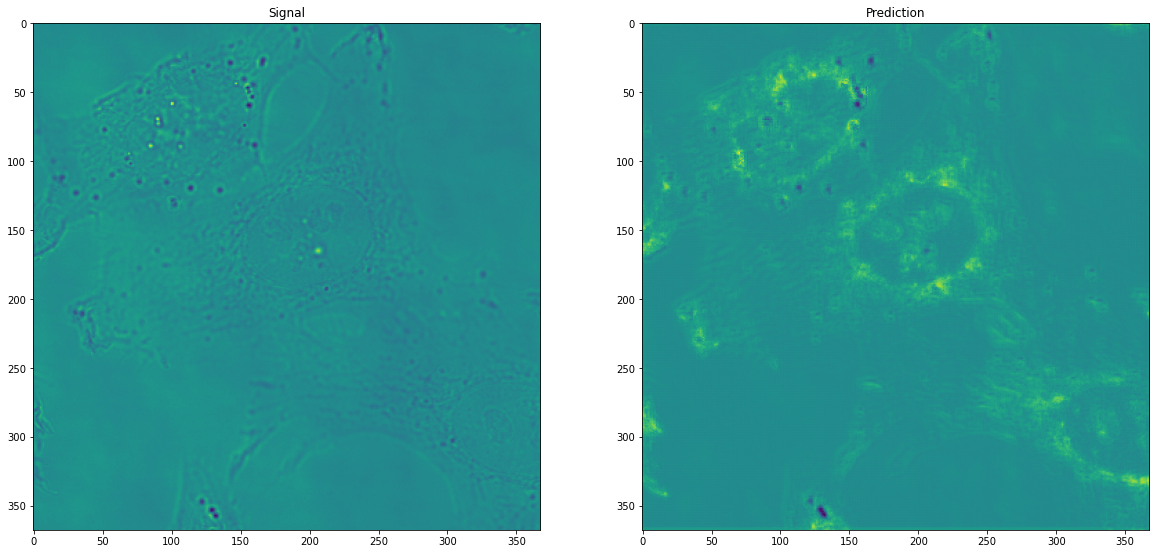

In [0]:
!pip install matplotlib==2.2.3
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os

##@markdown ###Select the image you would you like to view?
#image = "0" #@param {type:"string"}
os.chdir(Results_folder)

#@markdown ###Select the slice would you like to view?
slice_number = 21 #@param {type:"number"}
I = io.imread("signal_0.tiff")
I = np.squeeze(I,axis=(0,))
J = io.imread('prediction_'+Predictions_name+'_0.tiff')
J = np.squeeze(J,axis=(0,))

#Create the figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text('Signal')
ax2.title.set_text('Prediction')

ax1.imshow(I[slice_number,:,:])
ax2.imshow(J[slice_number,:,:])

## **5.3. Download your predicted output**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that notebook will otherwise **OVERWRITE** all files which have the same name.